<a href="https://colab.research.google.com/github/NancyBudgujjar/Liver-Disease-Prediction/blob/main/Final_GEC_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/uciml/indian-liver-patient-records

Prediction of Liver Disease using Random Forest classifierand balancing imbalanced data.
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India.
The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease).
This data set contains 441 male patient records and 142 female patient records.Any patient whose age exceeded 89 is listed as being of age "90".





In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/indian_liver_patient.csv')
df.shape

(583, 11)

In [4]:
df['Dataset'].value_counts()  # 1 = Liver disease and 2 is no disease

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
categories = {1: 1, 2: 0}   #Now we map 1 = 1(Liver disease), 2 = 0(no disease)
df['Dataset'] = df['Dataset'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.describe().T  #Values need to be normalized before fitting.

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,0.713551,0.452490,0.0,0.0,1.00,1.0,1.0


In [8]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [9]:
print(df['Albumin_and_Globulin_Ratio'].mean())

0.9470639032815197


In [10]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [11]:
df.duplicated().sum()

13

In [12]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'Dataset':'Label'})
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

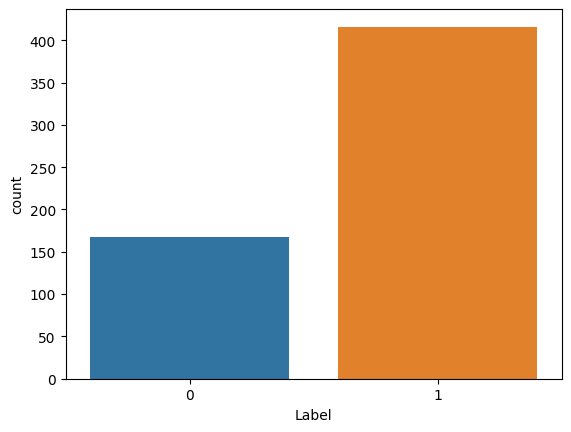

In [13]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

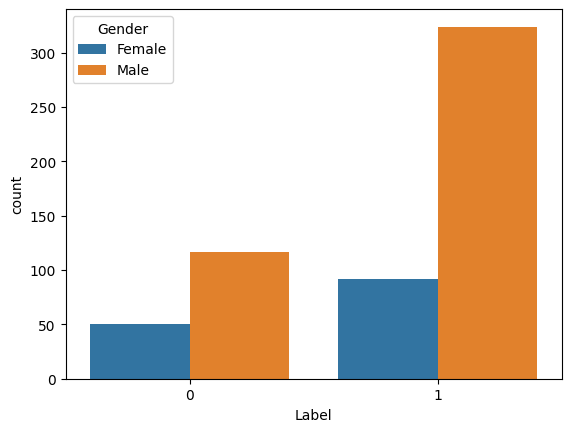

In [14]:
sns.countplot(x="Label", hue="Gender", data=df)

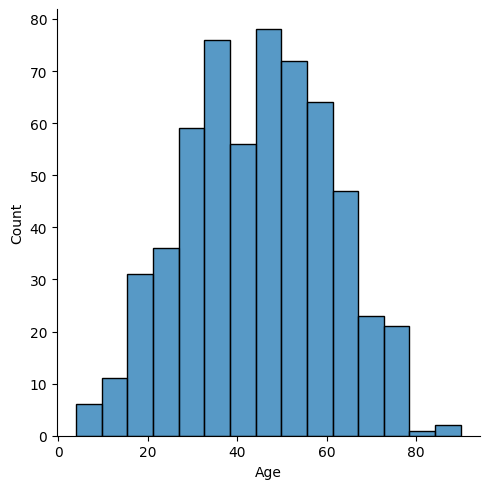

In [15]:
sns.displot(df['Age'], kde=False)

<Axes: xlabel='Age', ylabel='count'>

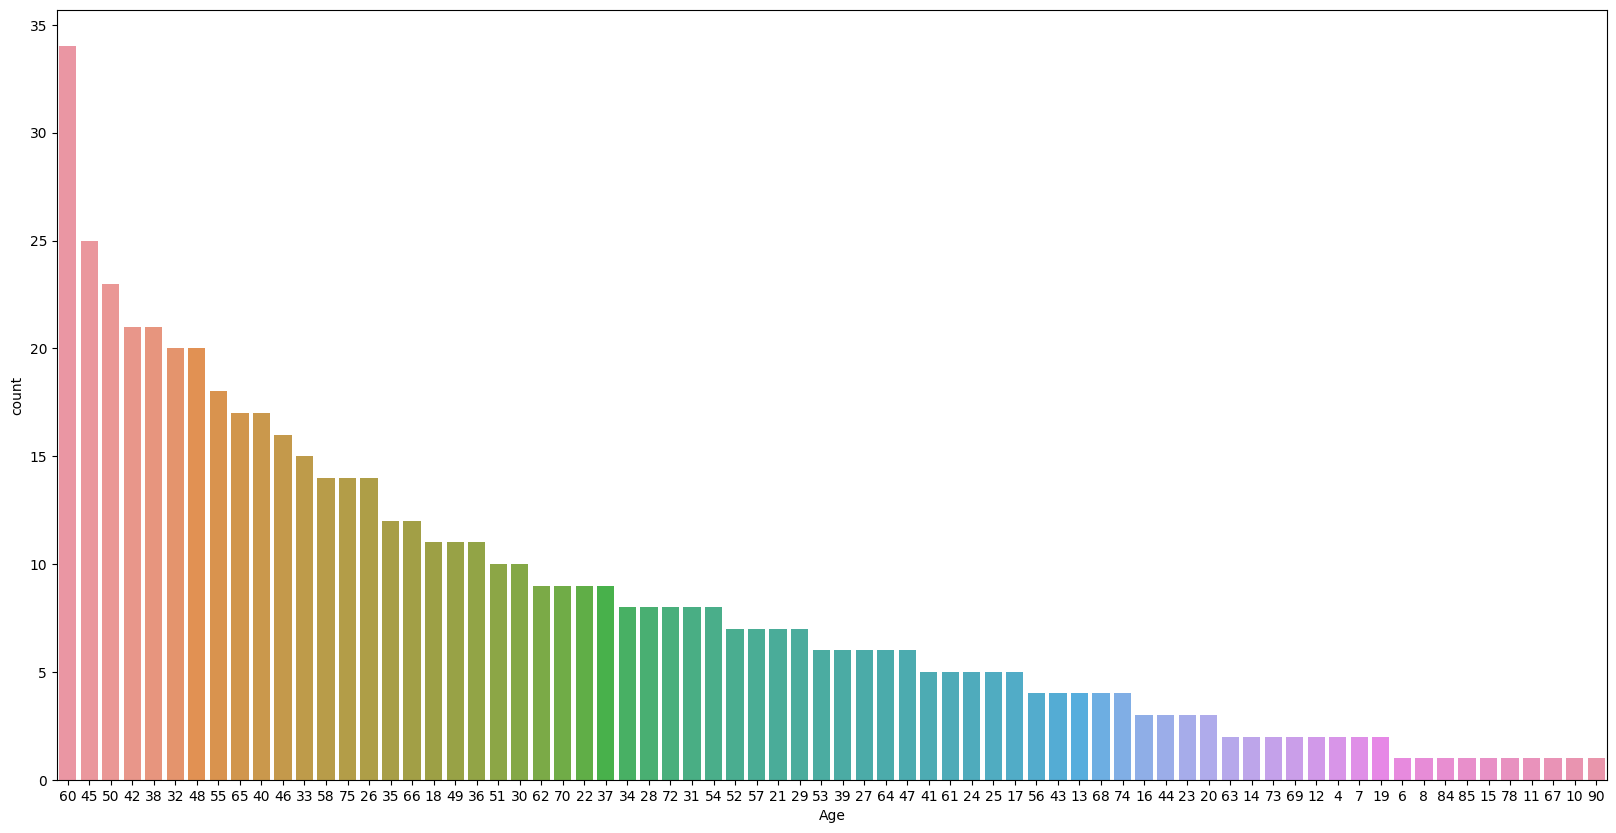

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='Albumin'>

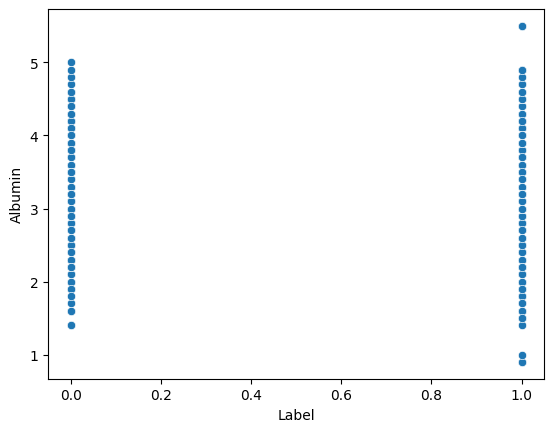

In [17]:
sns.scatterplot(x="Label", y="Albumin", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Label', ylabel='Albumin_and_Globulin_Ratio'>

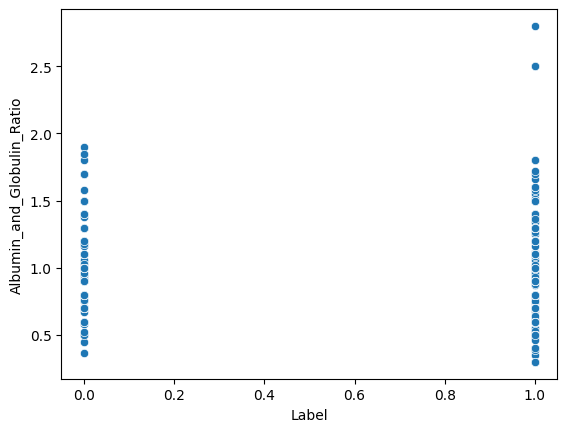

In [18]:
sns.scatterplot(x="Label", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

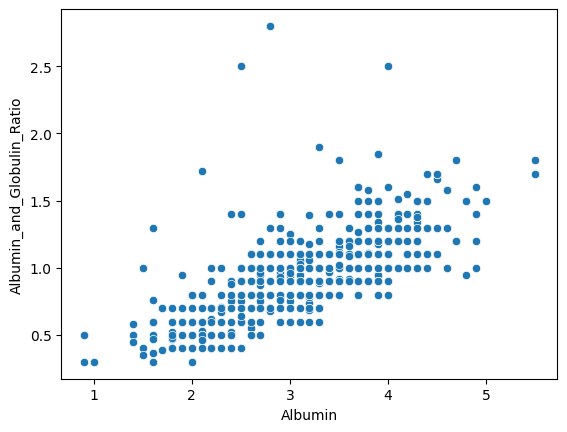

In [19]:
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

In [20]:
#sns.pairplot(df, hue='Gender')

<ipython-input-21-9569b0fec464>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

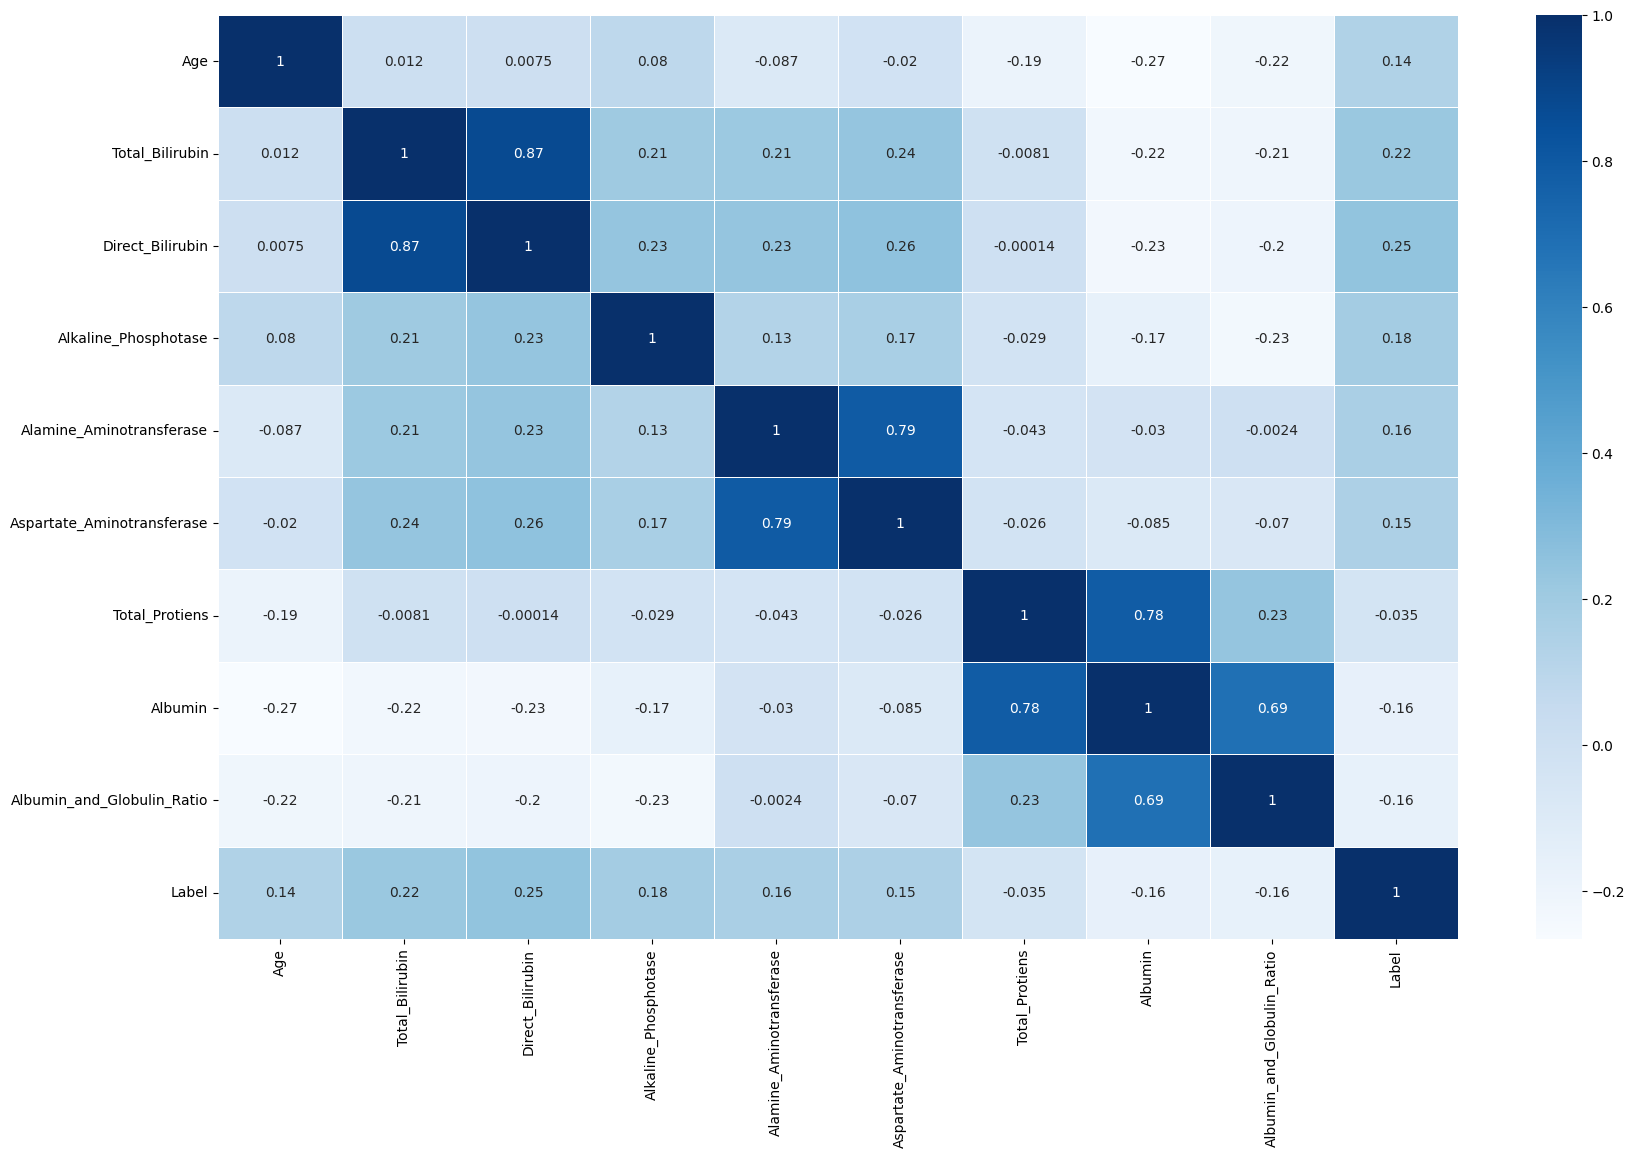

In [21]:
corr=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True)
#May be Gender and total protien not big factors influencing the label

In [22]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [23]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Gender'] = df['Gender'].replace(categories)

Y = df["Label"].values
#X = df.drop(labels = ["Label", "Gender"], axis=1)
X = df.drop(labels = ["Label"], axis=1)

In [24]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(466, 10)
(466,)


In [25]:
from keras.utils import normalize
X = normalize(X, axis=1)

# Technique 1: Appropriate Model Selection
Logistic regression :- Can be very slow.

SVM :- can also be extremely slow.

Random Forest :- ideal for imbalanced datasets.

#Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=900)

logreg.fit(X_train, y_train) # fit the model on the training data

y_pred = logreg.predict(X_test) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test, y_pred) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7521367521367521


#Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train) # Train the SVM model on the training data
y_pred = svm_model.predict(X_test) # Make predictions on the test data

accuracy = metrics.accuracy_score(y_test, y_pred) # Calculate the accuracy of the SVM model
print("Accuracy:", accuracy)

Accuracy: 0.7435897435897436


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

models= [
         ('Decision Tree', DecisionTreeClassifier()),
         ('RandomForestClassifier',RandomForestClassifier()),
         ('AdaBoostClassifier',AdaBoostClassifier()),
         ('XGBClassifier',XGBClassifier()),
         ('KNeighborsClassifier',KNeighborsClassifier()),
         ('GaussianNB',GaussianNB ())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                ModelName  Train_Acc  Test_Acc
0           Decision Tree   1.000000  0.717949
1  RandomForestClassifier   1.000000  0.752137
2      AdaBoostClassifier   0.806867  0.700855
3           XGBClassifier   1.000000  0.717949
4    KNeighborsClassifier   0.778970  0.683761
5              GaussianNB   0.551502  0.512821


#Random Forest

In [37]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Alkaline_Phosphotase          0.159246
Aspartate_Aminotransferase    0.130313
Age                           0.127091
Alamine_Aminotransferase      0.116930
Total_Protiens                0.100839
Total_Bilirubin               0.096881
Albumin                       0.093977
Direct_Bilirubin              0.077196
Albumin_and_Globulin_Ratio    0.076954
Gender                        0.020573
dtype: float64


In [38]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data.

print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test_RF))

METRICS FOR IMBALANCED DATA: 
Accuracy =  0.7350427350427351


In [39]:
(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print(unique, counts)

[0 1] [25 92]


In [40]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print(cm)

[[12 18]
 [13 74]]


means 12 out of 25 labled are correctly as 0(healthy patient) and 13/22 are mislablled as 1, i.e., 13 are healthy patients but still labelled as 1.

74 our of 92 are correctly labled and 18 are mislablled.

In [41]:
#Print individual accuracy values for each class, based on the confusion matrix
print("With NO Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("With Lung disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With NO Lung disease =  0.48
With Lung disease =  0.8043478260869565


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [42]:
from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

print("ROC_AUC score for imbalanced data is:")
print(roc_auc_score(y_test, prediction_test_RF))

ROC_AUC score for imbalanced data is:
0.6252873563218391


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


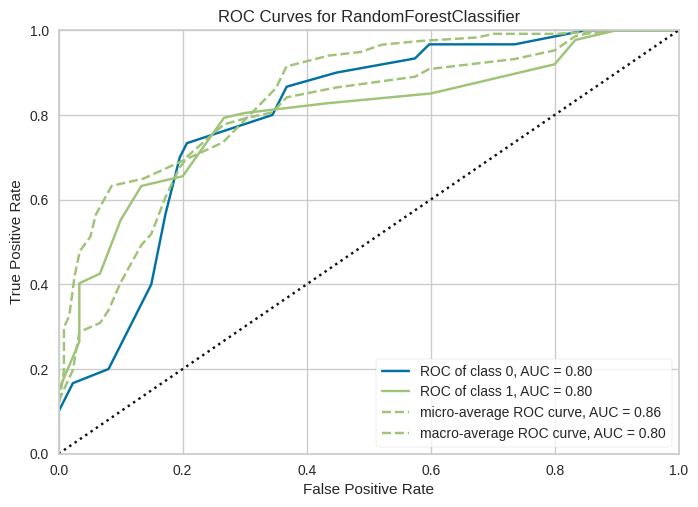

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

# Handling Imbalanced data

Technique 1: Generate synthetic data (SMOTE and ADASYN)
SMOTE: Synthetic Minority Oversampling Technique

ADASYN: Adaptive Synthetic

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

pip install imblearn

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [44]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1] [167 416]
After SMOTE:  [0 1] [416 416]


#Logestic Regression

In [45]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote) # fit the model on the training data
LR_prediction_smote = model_LR.predict(X_test_smote) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6047904191616766


In [46]:
print(roc_auc_score(y_test_smote, LR_prediction_smote))

0.6031159420289856


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


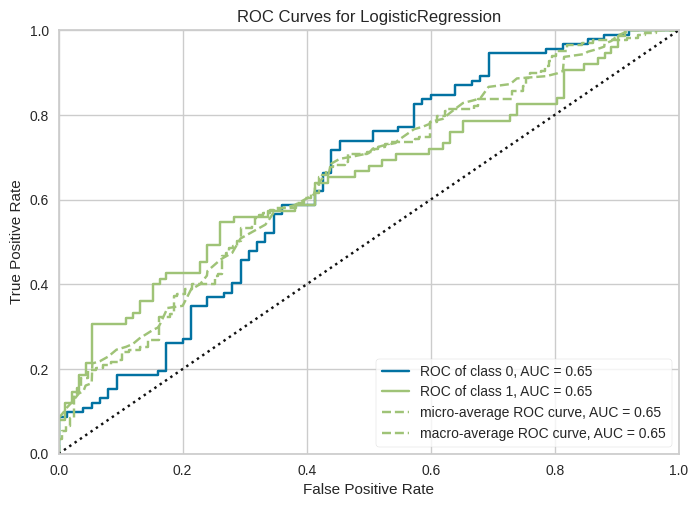

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#SVM

In [48]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_smote, y_train_smote)
SVM_prediction_smote = model_SVM.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, SVM_prediction_smote) # Calculate the accuracy of the SVM model after SMOTE
print("Accuracy:", accuracy)

Accuracy: 0.6407185628742516


In [49]:
print(roc_auc_score(y_test_smote, SVM_prediction_smote))

0.6160144927536232


#Random Forest

In [50]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

prediction_test_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, prediction_test_smote))

Accuracy =  0.7724550898203593


In [51]:
print(roc_auc_score(y_test_smote, prediction_test_smote))

0.7626811594202898


In [52]:
#Confusion Matrix
(unique, counts) = np.unique(prediction_test_smote, return_counts=True)
print(unique, counts)

cm = confusion_matrix(y_test_smote, prediction_test_smote)
print(cm)

[0 1] [104  63]
[[79 13]
 [25 50]]


In [53]:
print("With NO Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("With Lung disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With NO Lung disease =  0.7596153846153846
With Lung disease =  0.7936507936507936


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


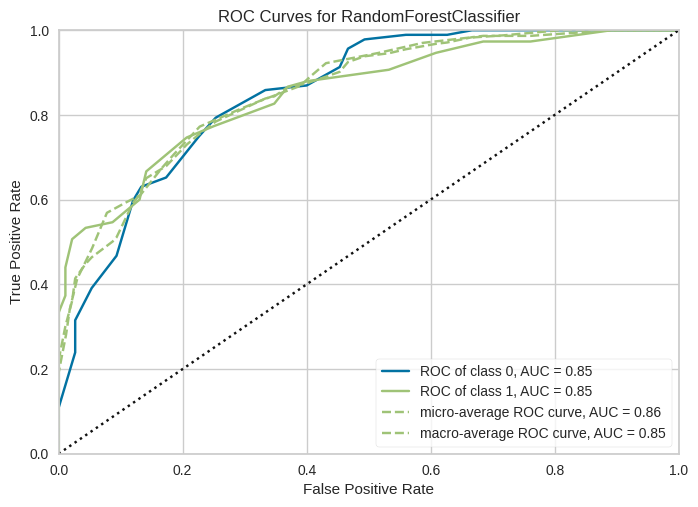

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#ADASYN

In [55]:
from imblearn.over_sampling import ADASYN

X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, Y_adasyn, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

Original data:  [0 1] [167 416]
After ADASYN:  [0 1] [388 416]


Logistic Regression

In [56]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_adasyn, y_train_adasyn) # fit the model on the training data
LR_prediction_adasyn = model_LR.predict(X_test_adasyn) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test_adasyn, LR_prediction_adasyn) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6086956521739131


SVM

In [57]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_adasyn, y_train_adasyn)
SVM_prediction_adasyn = model_SVM.predict(X_test_adasyn)

accuracy = metrics.accuracy_score(y_test_adasyn, SVM_prediction_adasyn) # Calculate the accuracy of the SVM model after SMOTE
print("Accuracy:", accuracy)

Accuracy: 0.5962732919254659


Random Forest

In [58]:
model_adasyn = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_adasyn.fit(X_train_adasyn, y_train_adasyn)

prediction_test_adasyn = model_adasyn.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, prediction_test_adasyn))

Accuracy =  0.7950310559006211


In [59]:
#Confusion Matrix
(unique, counts) = np.unique(prediction_test_adasyn, return_counts=True)
print(unique, counts)

cm = confusion_matrix(y_test_adasyn, prediction_test_adasyn)
print(cm)

[0 1] [92 69]
[[69 10]
 [23 59]]


In [60]:
print("With NO Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("With Lung disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With NO Lung disease =  0.75
With Lung disease =  0.855072463768116


In [62]:
print(roc_auc_score(y_test_adasyn, prediction_test_adasyn))

0.7964649583204693


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


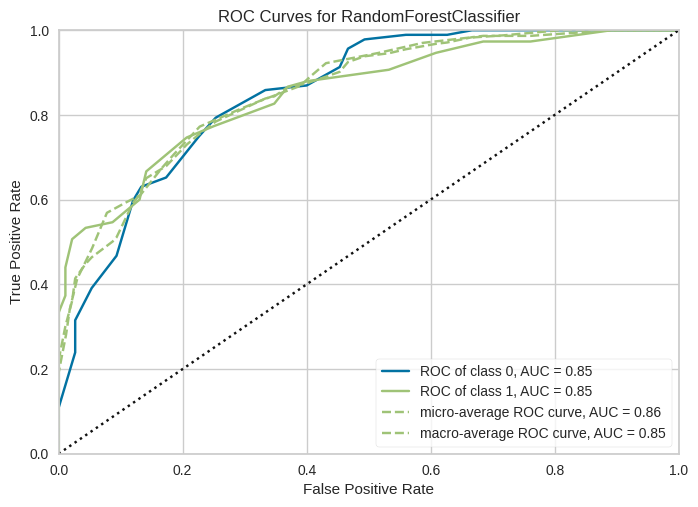

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [61]:
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

 Technique 2: Up-sample minority class

In [63]:
from sklearn.utils import resample
print(df['Label'].value_counts())

1    416
0    167
Name: Label, dtype: int64


In [64]:
df_majority = df[df['Label'] == 1]  #Separate majority and minority classes
df_minority = df[df['Label'] == 0]

In [65]:
# Upsample minority class and other classes separately
# If not, random samples from combined classes will be duplicated and we run into same issue as before, undersampled remians undersampled.
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match average class
                                 random_state=42) # reproducible results

In [66]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # Combine majority class with upsampled minority class
print(df_upsampled['Label'].value_counts())

1    416
0    416
Name: Label, dtype: int64


In [67]:
Y_upsampled = df_upsampled["Label"].values

X_upsampled = df_upsampled.drop(labels = ["Label", "Gender"], axis=1)
X_upsampled = normalize(X_upsampled, axis=1)

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

#Train again with new upsamples data

Logistic Regression

In [68]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_upsampled, y_train_upsampled) # fit the model on the training data
LR_prediction_upsampling = model_LR.predict(X_test_upsampled) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test_upsampled, LR_prediction_upsampling) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6287425149700598


SVM

In [85]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_upsampled, y_train_upsampled)
SVM_prediction_upsampling = model_SVM.predict(X_test_upsampled)

accuracy = metrics.accuracy_score(y_test_upsampled, SVM_prediction_upsampling) # Calculate the accuracy of the SVM model after SMOTE
print("Accuracy:", accuracy)

Accuracy: 0.5808383233532934


RANDOM FOREST

In [70]:
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
prediction_test_RF_upsampled = model_RF_upsampled.predict(X_test_upsampled)

print("METRICS FOR BALANCED DATA USING UPSAMPLING : ")
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, prediction_test_RF_upsampled))

METRICS FOR BALANCED DATA USING UPSAMPLING : 
Accuracy =  0.8622754491017964


In [71]:
(unique, counts) = np.unique(prediction_test_RF_upsampled, return_counts=True)
print(unique, counts)

[0 1] [88 79]


In [72]:
cm_upsampled = confusion_matrix(y_test_upsampled, prediction_test_RF_upsampled)
print(cm_upsampled)

[[71  6]
 [17 73]]


In [73]:
print("With NO Lung disease =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0]))
print("With lung disease = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1]))

With NO Lung disease =  =  0.8068181818181818
With lung disease =  0.9240506329113924


In [74]:
print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, prediction_test_RF_upsampled))

ROC_AUC score for balanced data using upsampling is:
0.8665945165945166


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


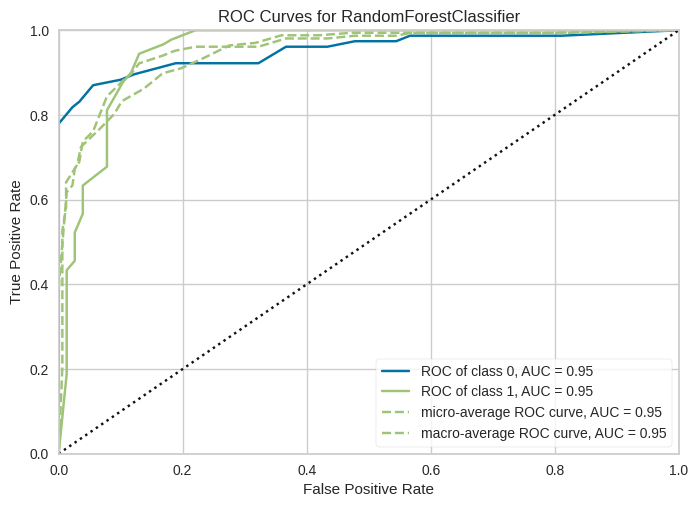

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF_upsampled)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

In [ ]:
'''
#SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X_upsampled, Y_upsampled)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)
(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)
(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)
model_upsampled_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_upsampled_SMOTE.fit(X_train_smote, y_train_smote)
prediction_test_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, prediction_test_smote))
print(roc_auc_score(y_test_smote, prediction_test_smote))
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()
'''

#ENSEMBLE METHODS

In [77]:
# AVERAGING METHOD
from sklearn.metrics import mean_squared_error

pred1 = LR_prediction_upsampling
pred2 = SVM_prediction_upsampling
pred3 = prediction_test_RF_upsampled

pred_final = (pred1+pred2+pred3)/3.0

# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test_upsampled, pred_final))

0.21623419827012644


In [80]:
# MAX VOTING
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

model_1 = model_LR
model_2 = model_SVM
model_3 = model_RF

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('logr', model_1), ('svm', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train_upsampled, y_train_upsampled)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test_upsampled)

# printing log loss between actual and predicted value
print(log_loss(y_test_upsampled, pred_final))

11.870664289829003


In [79]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19865 sha256=c449d4cd793369b77477c6c1da882ccde4256b436c2773d31c7b5b314feebcfc
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [82]:
# VOTING ENSEMBLE
from sklearn import model_selection
seed = 42
kfold = model_selection.KFold(n_splits=20)

estimators = [] # create different models

model_1 = LogisticRegression(); estimators.append(('logistic',model_1))
model_2 = SVC(); estimators.append(('svm',model_2))
model_3 = RandomForestClassifier(); estimators.append(('rf',model_3))

from sklearn.ensemble import VotingClassifier # create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train_upsampled, y_train_upsampled, cv=kfold)
print(results.mean())

0.6251782531194296


In [ ]:
'''
# TUNE ENSEMBLE
from sklearn.model_selection import cross_val_score, GridSearchCV

lr = LogisticRegression(solver='liblinear', random_state=1)
rf = RandomForestClassifier(max_features=9, n_jobs=4, random_state=1)
sv = SVC()

vc = VotingClassifier([('clf1',lr), ('clf2',rf), ('clf3',sv)]) # create an ensemble of 3 classifiers
cross_val_score(vc,X_train_smote, y_train_smote).mean()
param = {'voting':['hard', 'soft'], 'weights': [(1,1,1),(2,1,1),(1,2,1),(1,1,2)]} # define VotingClassifier parameters to search

grid = GridSearchCV(vc, param) #find the best set of parameters
grid.fit(X_train_smote, y_train_smote)
grid.best_score_
'''

 # k-folds validation

In [128]:
from sklearn.model_selection import cross_val_score
#In general, the more folds we use in k-fold cross-validation the lower the bias of the test MSE
#but the higher the variance. Conversely, the fewer folds we use the higher the bias but the lower the variance

scores = cross_val_score(model_RF, X_upsampled, Y_upsampled, scoring='r2', cv=10) # 10 folds
print(scores)

[0.66666667 0.33333333 0.80720093 0.22880372 0.42160279 0.56620209
 0.03600465 0.27700348 0.61440186 0.61440186]


In [129]:
print(np.mean(scores))

0.4565621370499421


In [136]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF, X_upsampled, Y_upsampled)
#print(pred)

In [131]:
scores_test = cross_val_score(model_RF, X_upsampled, Y_upsampled, cv=10)
print(scores_test)

[0.91666667 0.83333333 0.95180723 0.80722892 0.85542169 0.89156627
 0.75903614 0.81927711 0.90361446 0.90361446]


In [132]:
print(np.mean(scores_test))

0.8641566265060241


KFold on Logestic Regression model

In [134]:
scores = cross_val_score(model_LR, X_upsampled, Y_upsampled, scoring='r2', cv=10)
#print(scores)

print(np.mean(scores))

pred = cross_val_predict(model_LR, X_upsampled, Y_upsampled)
#print(pred)

scores_test = cross_val_score(model_LR, X_upsampled, Y_upsampled, cv=10)
#print(scores_test)

print(np.mean(scores_test))

-0.6450058072009288
0.5887980493402181


KFold on SVM model

In [135]:
scores = cross_val_score(model_SVM, X_upsampled, Y_upsampled, scoring='r2', cv=10)
#print(scores)

print(np.mean(scores))

pred = cross_val_predict(model_SVM, X_upsampled, Y_upsampled)
#print(pred)

scores_test = cross_val_score(model_SVM, X_upsampled, Y_upsampled, cv=10)
#print(scores_test)

print(np.mean(scores_test))

-0.6926248548199763
0.5768932874354562
